<H1 style="text-align:center">Machine Learning with small datasets</H1>
<H2 style="text-align:center">Performance comparison for Neural Networks and Principal Component Analysis</H2>

<h3>Library loading</h3>

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from PIL import Image
from time import time
import logging
import site
import numpy as np
import os
import sys
import tarfile
from IPython.display import display
from IPython.display import Image as image2
#from PIL import Image
from scipy import ndimage
from os.path import isfile, join
import h5py
import pandas
from scipy import stats, integrate
import seaborn as sns
import cv2
from six.moves import cPickle as pickle
import tensorflow as tf
%matplotlib inline

####added for PCA exercise ###

from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.grid_search import GridSearchCV



####added for KERAS implementation ###

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import *
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


<h3>Image file validation</h3>

checking image existence: ['134.jpg', '261.jpg', '1.jpg', '10.jpg', '100.jpg']


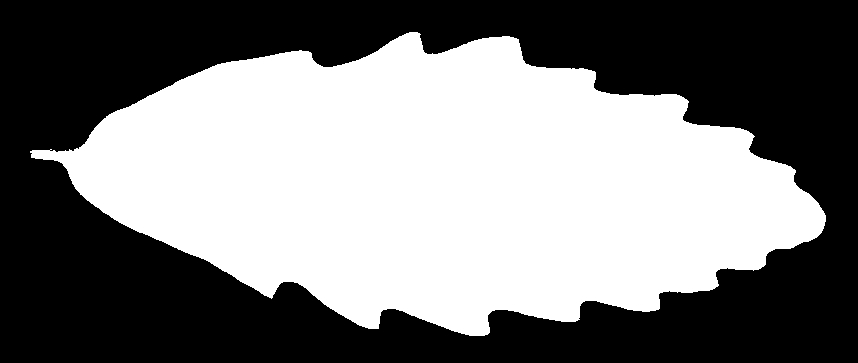

In [17]:
print("checking image existence: %s" % os.listdir('images')[:5])
display(image2(filename="images/10.jpg"))

<h3>Explanatory Data validation</h3>

In [2]:
train_data = pandas.read_csv('train.csv')
test_data = pandas.read_csv('test.csv')
print("we have %s train samples" % np.shape(train_data)[0])
print("and %s test samples" % np.shape(test_data)[0])

we have 990 train samples
and 594 test samples


In [5]:
print(train_data["species"][:5])
print(train_data["id"][:5])

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object
0    1
1    2
2    3
3    5
4    6
Name: id, dtype: int64


<h3>Samples per Label Frequencies</h3>

We have 99 labels


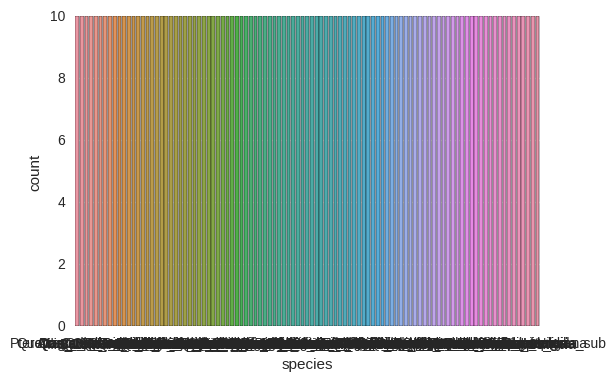

In [6]:
x = train_data["species"]
print("We have %s labels" % train_data["species"].nunique())
import seaborn as sns
sns.countplot(x)


<h3>Image Size Normalization</h3>

In [7]:
image_names = [f for f in os.listdir('images') if isfile(join('images', f))] 
dim_images = []
print("launch dimension collector")
def get_dimensions(archives):
    for i in archives:
        try:
            with Image.open("images/"+i) as im:
                width, height = im.size
                dim_images.append((width,height))
        except:
            print("exception")

get_dimensions(image_names)

launch dimension collector


In [8]:
len(dim_images)

1584

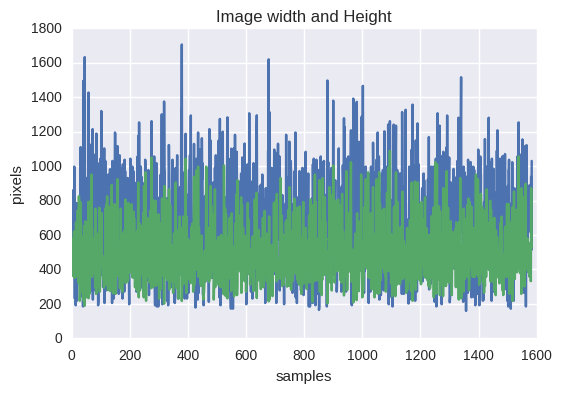

In [9]:
plt.xlabel('samples')
plt.ylabel('pixels')
plt.title('Image width and Height')
plt.plot(dim_images)

In [10]:
files_train = train_data["id"]
print(len(files_train))
def resize_img():
    for i in files_train:
        j = files_train[i]
        try:
            with Image.open("images/"+str(files_train[j])+".jpg") as im:         
                im = im.resize([64,64], Image.ANTIALIAS)
                im.save("imresized/"+str(files_train[j])+".jpg")
        except:
            print("%s caused trouble"% i)
                           
#resize_img()

990


In [50]:
files_train[2]

3

launch dimension collector


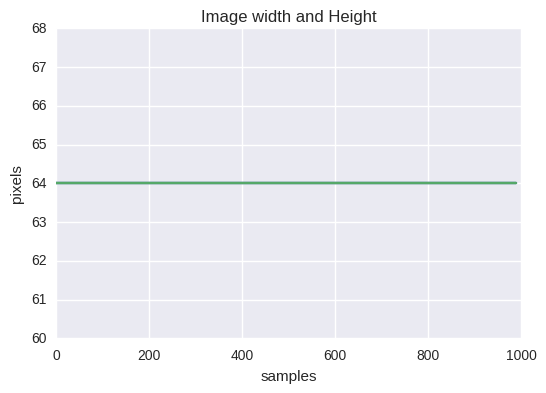

In [11]:
image_names = [f for f in os.listdir('imresized') if isfile(join('imresized', f))] 
dim_images = []
print("launch dimension collector")
def get_dimensions(archives):
    for i in archives:
        try:
            with Image.open("imresized/"+i) as im:
                width, height = im.size
                dim_images.append((width,height))
        except:
            print("exception")

get_dimensions(image_names)
plt.xlabel('samples')
plt.ylabel('pixels')
plt.title('Image width and Height')
plt.plot(dim_images)

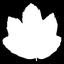

['411.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg']


In [93]:
display(image2(filename="imresized/1.jpg"))
folder = "imresized/"
image_files = os.listdir(folder)
print(image_files[0:5])
###this is causing wrong image sequences for our array !!!#

<h3>Image pickle file building and normalization</h3>

In [111]:
files_train = train_data["id"]
print(files_train[0:5])
def build_filenames():
    new = []
    for i in range(0,len(files_train)):
       
        new.append( str(files_train[i]-1) + ".jpg")

    return new

files_train = build_filenames()
    
print(files_train[0:5])

0    2
1    3
2    4
3    6
4    7
Name: id, dtype: int64
['1.jpg', '2.jpg', '3.jpg', '5.jpg', '6.jpg']


In [137]:

folder = "imresized/"


channels = 1
image_size = 64
pixel_depth = 255.0  # Number of levels per pixel.


def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = files_train
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size,channels),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = cv2.imread(image_file,0)
      image_data = np.expand_dims(image_data, axis = 2)
      image_data = image_data / pixel_depth

      dataset[num_images, :, :,:] = image_data
      num_images = num_images + 1
    except:
      print('error!')
    
  dataset = dataset[0:num_images, :, :,:]
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
own_dataset = load_letter(folder,5)



imresized/
Full dataset tensor: (990, 64, 64, 1)
Mean: 0.462755
Standard deviation: 0.484573


In [138]:
train_labels = train_data["species"]

In [139]:
pickle_file = 'leafs.pickle'

dataset={
    'train_dataset': train_dataset,
     'train_labels': train_labels,
   # 'test_dataset': test_dataset,
}

with open(pickle_file, 'wb') as picklefile:
    pickle.dump(dataset, picklefile, pickle.HIGHEST_PROTOCOL)
picklefile.close()

In [140]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 16224638


<h4>Checkpoint if pickle file already exists</h4>

In [3]:
pickle_file = 'leafs.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  del save 



<H3>One Hot Label encoding</H3>

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [5]:
le = preprocessing.LabelEncoder()
le.fit(train_labels)
LabelEncoder()
list(le.classes_)
#bob = list(le.classes_)
transf_labels = le.transform(train_labels) 

In [6]:
#print(train_dataset.shape)
print(train_labels.shape)
print(train_labels[180])
print(transf_labels[180])
print(len(transf_labels))


(990,)
Acer_Opalus
3
990


In [8]:
def onehot_labels():
    newarray = []
    for i in range(len(transf_labels)):
        labelrack = []
        labelrack = np.zeros(100)
        hotno = transf_labels[i]
        labelrack[hotno] = 1.0
        newarray.append(labelrack)

    return newarray
        
newarray = onehot_labels()


<h1>Neural Network Section</h1>
<h3>Data array reshaping</h3>

In [260]:
image_size = 64
num_channels = 1
####for my non convoluted network attempt the formatting will go ahead with two keys for x and y parameters each

def reshape(dataset, labels):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    #setting this as float will cause problems
    #labels = transf_labels.astype(np.int32)
    labels = np.array(newarray).astype(np.float32)
    return dataset, labels

train_dataset, train_labels = reshape(train_dataset, train_labels)
print('Training set', train_dataset.shape, train_labels.shape)


Training set (990, 64, 64, 1) (990, 100)


<h3>Variable setting for KERAS Neural Network model</h3>

In [16]:
batch_size = 50
nb_classes = 100
nb_epoch = 10
img_rows, img_cols = 64,64
input_shape = (img_rows, img_cols, 1)
# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

<h3> Data augmentation engine</h3>

In [17]:

#Y_train = np_utils.to_categorical(y_train, nb_classes)


datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_dataset)

<h3>Model Design</h3>
<h2>Convolutional Neural Network with MaxPooling and a densely connected layer</h2>

In [18]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],border_mode='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 62, 62, 64)    640         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 62, 62, 64)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 60, 60, 64)    36928       activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 60, 60, 64)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

<h3>Model Training with Results</h3>

In [20]:
model.fit_generator(datagen.flow(train_dataset, train_labels, batch_size=32),
                    samples_per_epoch=len(train_dataset), nb_epoch=nb_epoch)
score = model.evaluate(train_dataset,train_labels, verbose=0)
model.save_weights('leafcnn.h5')
print('Test score:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
990/990 [==============================] - 137s - loss: 15.6164 - acc: 0.0081         

<h1>Principal Component Analysis Section</h1>
<h3>Data reshaping</h3>

In [110]:
image_size = 64
num_channels = 1

def reshape(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)

    labels = np.array(newarray).astype(np.float32)
    return dataset, labels

train_dataset, train_labels = reshape(train_dataset, train_labels)
print('Training set', train_dataset.shape, train_labels.shape)


Training set (990, 4096) (990, 100)


In [111]:
train_labels = train_data["species"]
####data processing part in beginning of file needs to run for this###
target_names = list(le.classes_)

<h3>Training and Test Set Splitting</h3>

In [112]:

h, w = 64, 64

X_train, X_test, y_train, y_test = train_test_split(
    train_dataset, train_labels, test_size=0.2, random_state=7)
n_components = 200

<h3>Model fitting</h3>

In [119]:
print("Fitting the top %d eigenleaf vectors from %d images to the model"
      % (n_components, X_train.shape[0]))
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

eigenleafs = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Fitting the top 200 eigenleaf vectors from 792 images to the model


<h3>Training SVM (Sigmoid Kernel) to Model</h3>

In [120]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0003, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.2], }
clf = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

print("Grid Search Results:")
print(clf.best_estimator_)

Grid Search Results:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


<h3>Predictions for Test Set</h3>

In [121]:
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))

done in 0.153s
                              precision    recall  f1-score   support

             Acer_Capillipes       0.25      0.50      0.33         2
             Acer_Circinatum       1.00      0.60      0.75         5
                   Acer_Mono       1.00      1.00      1.00         1
                 Acer_Opalus       0.50      0.50      0.50         2
               Acer_Palmatum       1.00      1.00      1.00         2
                 Acer_Pictum       0.60      1.00      0.75         3
             Acer_Platanoids       1.00      1.00      1.00         2
                 Acer_Rubrum       1.00      1.00      1.00         1
              Acer_Rufinerve       0.50      1.00      0.67         1
            Acer_Saccharinum       0.50      0.67      0.57         3
               Alnus_Cordata       0.67      1.00      0.80         2
          Alnus_Maximowiczii       0.75      0.60      0.67         5
                 Alnus_Rubra       1.00      1.00      1.00         1
    

In [23]:
from sklearn.externals import joblib
joblib.dump(clf, 'leaf_model.pkl', compress=9)
print("Classifier stored to harddrive")

Classifier stored to harddrive


<h3>Displaying Sample Predictions</h3>

In [24]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [25]:
y_test = np.asarray(y_test)

def title():
    
    pred_titles = []
    for i in range(1,len(y_pred)):
        pred_index = target_names.index(y_pred[i])
        true_index = target_names.index(y_test[i])
        pred_name = target_names[pred_index]
        true_name = target_names[true_index]
        pred_titles.append('pred: %s\ntrue:      %s' % (pred_name[:10], true_name[:10]))
        
    return pred_titles

results = title()

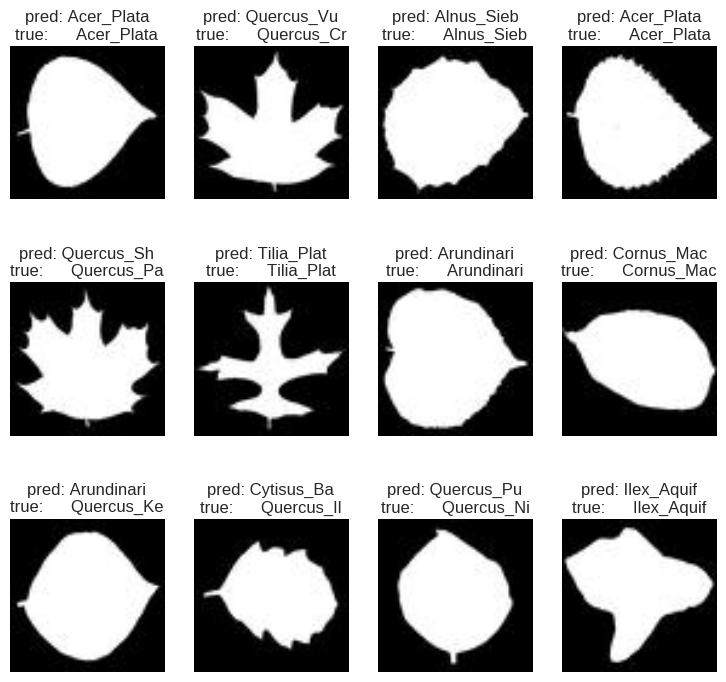

In [26]:
plot_gallery(X_test, results, h, w)

<h3>Displaying principal component vectors (eigenvectors)</h3>

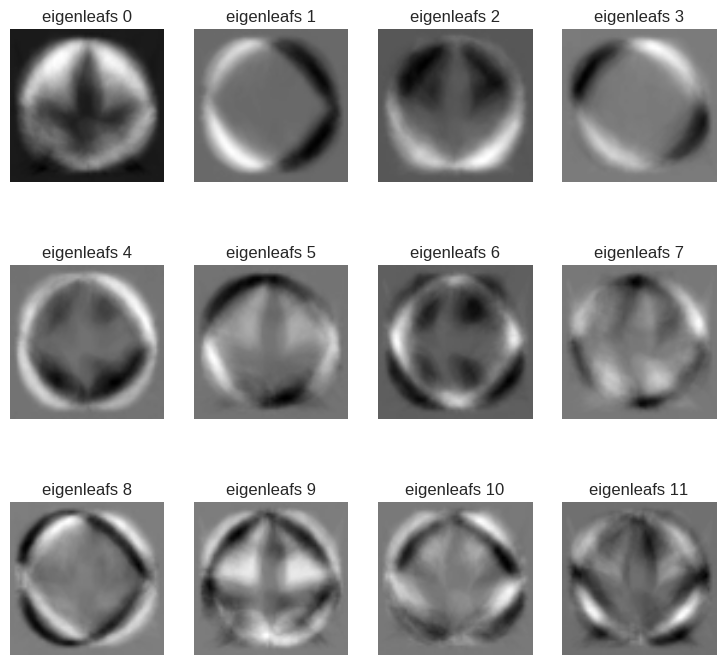

In [27]:
eigenleaf_titles = ["eigenleafs %d" % i for i in range(eigenleafs.shape[0])]
plot_gallery(eigenleafs, eigenleaf_titles, h, w)

plt.show()

<h3>Predictions for Unseen Data</h3>

In [147]:
with Image.open("images/695.jpg") as im:         
    im = im.resize([64,64], Image.ANTIALIAS)
    im.save("unseen/3.jpg")

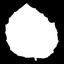

In [148]:
filename="unseen/1.jpg"
display(image2(filename))

In [149]:
unseen = np.ndarray(shape=(3, 64,64,1),dtype=np.float32)


image_data = cv2.imread(filename,0)
image_data = np.expand_dims(image_data, axis = 2)
image_data = image_data / 255.0
unseen[0, :, :,:] = image_data

filename="unseen/2.jpg"

image_data = cv2.imread(filename,0)
image_data = np.expand_dims(image_data, axis = 2)
image_data = image_data / 255.0
unseen[1, :, :,:] = image_data

filename="unseen/3.jpg"

image_data = cv2.imread(filename,0)
image_data = np.expand_dims(image_data, axis = 2)
image_data = image_data / 255.0
unseen[2, :, :,:] = image_data

(3, 64, 64, 1)


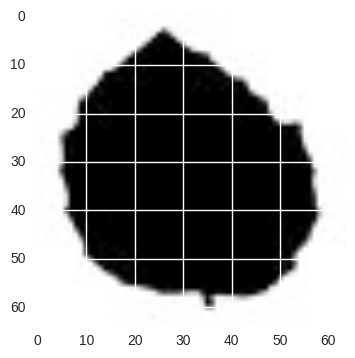

In [150]:
print(unseen.shape)
plt.imshow(unseen[0,:,:,0])
plt.show()

In [151]:
def reshape(dataset):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    return dataset
unseen = reshape(unseen)
print('validation set', unseen.shape)


validation set (3, 4096)


<h3>Loading pretrained classifier, pca transform new data and predict</h3>

In [152]:
trained_model = joblib.load('leaf_model.pkl')

In [153]:
unseen_pca = pca.transform(unseen)

In [158]:
y_pred = trained_model.predict(unseen_pca)


print("predictions for unseen images are : %s " % y_pred[:3])

predictions for unseen images are : ['Quercus_Ellipsoidalis' 'Quercus_Ellipsoidalis' 'Quercus_Ellipsoidalis'] 
